In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
data = pd.read_csv('outputboth.csv')
data.head()

,size,avg_b,avg_g,avg_r,avg_h,avg_s,avg_v,std_b,std_g,std_r,std_h,std_s,std_v,blob_count,fire
0,176141.303500,104.947354,135.533988,158.568673,35.129662,35.012845,62.184098,60.323970,50.625310,43.618972,211.486655,29.389916,23.794505,305,0
1,497.815923,67.796739,82.263213,114.382542,25.227712,40.987638,44.855899,30.235040,32.229430,30.487557,107.409558,16.377989,13.148163,125,0
2,8833.302812,36.069517,52.295368,64.593577,33.364462,44.100658,25.330814,15.078778,15.580350,16.307787,86.759477,10.011240,6.483293,227,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,43903.892090,42.559228,62.176688,79.246522,33.873271,45.716152,31.077068,23.735018,25.260117,29.933102,245.595191,19.892570,11.838237,559,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        637 non-null    float64
 1   avg_b       637 non-null    float64
 2   avg_g       637 non-null    float64
 3   avg_r       637 non-null    float64
 4   avg_h       637 non-null    float64
 5   avg_s       637 non-null    float64
 6   avg_v       637 non-null    float64
 7   std_b       637 non-null    float64
 8   std_g       637 non-null    float64
 9   std_r       637 non-null    float64
 10  std_h       637 non-null    float64
 11  std_s       637 non-null    float64
 12  std_v       637 non-null    float64
 13  blob_count  637 non-null    int64  
 14  fire        637 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 74.8 KB


<h2>Dropping Rows With All Zeros</h2><br>
We noticed that the output produced from blobbing contains rows with all zeros. These zeros mean that the ...

In [16]:
df = pd.DataFrame(data=data)
# Drop rows with all zeros
df = df.loc[(df!=0).any(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628 entries, 0 to 636
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        628 non-null    float64
 1   avg_b       628 non-null    float64
 2   avg_g       628 non-null    float64
 3   avg_r       628 non-null    float64
 4   avg_h       628 non-null    float64
 5   avg_s       628 non-null    float64
 6   avg_v       628 non-null    float64
 7   std_b       628 non-null    float64
 8   std_g       628 non-null    float64
 9   std_r       628 non-null    float64
 10  std_h       628 non-null    float64
 11  std_s       628 non-null    float64
 12  std_v       628 non-null    float64
 13  blob_count  628 non-null    int64  
 14  fire        628 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 78.5 KB


---
## Exploratory Data Analysis

Lets start by exploring the response variable `fire`, we will be using this variable to predict on test dataset later.

/Users/yuangeng/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


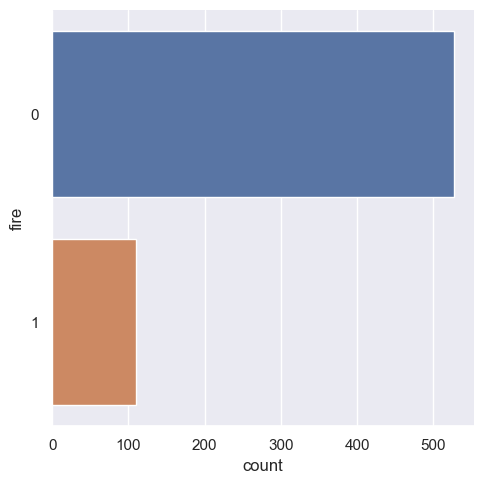

In [17]:
sb.catplot(y = 'fire', data = data, kind = "count")

In [19]:
df[['avg_r','avg_g','avg_b', 'avg_h', 'avg_s', 'avg_v']].describe()

,avg_r,avg_g,avg_b,avg_h,avg_s,avg_v
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,138.137618,102.247393,73.330552,31.309566,46.737226,54.187696
std,29.416240,26.470791,25.346941,7.995133,15.372305,11.540429
min,62.992790,15.817852,3.414088,9.913042,15.568409,24.703055
25%,118.382729,84.425591,56.611122,26.026740,35.060374,46.424600
50%,138.055793,101.477808,73.344839,31.131104,43.167283,54.145743
75%,155.944903,119.522702,90.001969,35.931630,55.779541,61.191220
max,250.967456,192.682489,156.390523,75.730538,98.206498,98.418610


In [20]:
df[['std_r','std_g','std_b', 'std_h', 'std_s', 'std_v']].describe()

,std_r,std_g,std_b,std_h,std_s,std_v
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,40.823717,38.199429,33.628500,97.896997,24.608073,16.918352
std,13.273310,13.177739,12.248497,68.757465,14.058516,5.610935
min,1.356466,1.356466,1.356466,0.000000,0.000000,0.531947
25%,31.230960,28.424437,24.917775,49.103273,15.018773,13.061133
50%,40.788556,37.724930,32.941996,73.367610,20.830518,17.018460
75%,51.377847,47.567367,40.855931,127.511218,30.157660,21.012504
max,71.205186,78.202530,79.777479,359.686668,86.401505,34.699996
